# Single Parent Population
## seventh
### 00/03/11

Simple branching process critical exponent estimation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### n off-spring each by p probability

In [2]:
#Poisson distribution assumption

def next_gen(n, pc):
    n_next  = 0
    inf_num = 0
    for i in range(n):
        p = np.random.uniform(0, 1, 2)
        p[p > (1-pc)] = 1
        p[p < (1-pc)] = 0
        inf_num = np.sum(p)
        n_next += inf_num
    return int(n_next)

In [71]:
next_gen(1, 0)

0

### Critical value of $\lambda$ average of children number

In [79]:
#does it extinc?

def extinc(pop_0, pc):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(next_gen(pop[i], pc))
        i += 1
        
        if pop[i] < 0.002 * pop[0]:
            return 1
        if pop[i] > 40 * pop[0]:
            return 0

In [80]:
#probability of extinction

def ext_prob(pop_0, pc):
    samples = 500
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, pc)

    extinction_probability = extinctions / samples

    return extinction_probability

Wall time: 1min 19s


Text(0.5, 0, '$p$')

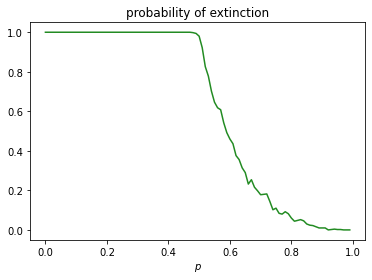

In [81]:
%%time

p_mat     = np.arange(0, 1, 0.01)
probability = np.zeros(np.size(p_mat)) 

pop_0 = 1

for i in range(np.size(p_mat)):
    probability[i] = ext_prob(pop_0, p_mat[i])
    
    
plt.plot(p_mat, probability, c = 'forestgreen')
plt.title("probability of extinction")
plt.xlabel("$p$")


Text(0.5, 0, '$p$')

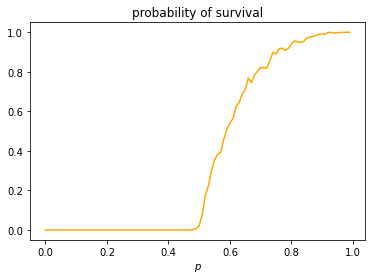

In [82]:
plt.plot(p_mat, (1 - probability), c = 'orange')
plt.title("probability of survival")
plt.xlabel("$p$")

# plt.savefig("survival probability.png")

In [83]:
%%time

p_mat     = np.arange(0.5005, 0.55, 0.0005)
probability = np.zeros(np.size(p_mat)) 

pop_0 = 1

for i in range(np.size(p_mat)):
    probability[i] = ext_prob(pop_0, p_mat[i])


Wall time: 3min 36s


We know that the size of the such a system is number of generation. well, we have seen above that the initial population size works like number of generation. It's not unexpected.

In [84]:
print(1-probability,'\n', p_mat, np.size(p_mat))

[0.034 0.022 0.026 0.028 0.04  0.036 0.044 0.052 0.058 0.052 0.046 0.056
 0.058 0.058 0.074 0.066 0.056 0.078 0.058 0.088 0.096 0.088 0.09  0.086
 0.096 0.088 0.088 0.108 0.096 0.13  0.104 0.162 0.13  0.114 0.124 0.122
 0.146 0.13  0.14  0.144 0.166 0.138 0.126 0.156 0.168 0.154 0.196 0.188
 0.16  0.192 0.16  0.186 0.188 0.186 0.216 0.19  0.214 0.226 0.242 0.226
 0.202 0.202 0.214 0.236 0.246 0.222 0.238 0.262 0.23  0.224 0.274 0.264
 0.296 0.266 0.234 0.288 0.238 0.266 0.3   0.328 0.292 0.268 0.272 0.292
 0.296 0.262 0.274 0.302 0.256 0.29  0.33  0.284 0.346 0.314 0.32  0.304
 0.294 0.332 0.318 0.286] 
 [0.5005 0.501  0.5015 0.502  0.5025 0.503  0.5035 0.504  0.5045 0.505
 0.5055 0.506  0.5065 0.507  0.5075 0.508  0.5085 0.509  0.5095 0.51
 0.5105 0.511  0.5115 0.512  0.5125 0.513  0.5135 0.514  0.5145 0.515
 0.5155 0.516  0.5165 0.517  0.5175 0.518  0.5185 0.519  0.5195 0.52
 0.5205 0.521  0.5215 0.522  0.5225 0.523  0.5235 0.524  0.5245 0.525
 0.5255 0.526  0.5265 0.527  0.5275 0.52

In [85]:
fit = np.polyfit(np.log(p_mat - 0.5), np.log(1-probability), 1)

fit

array([0.71482057, 0.92688393])

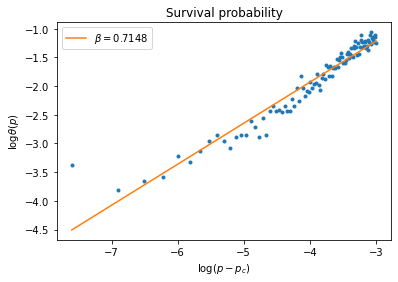

In [86]:
plt.plot(np.log(p_mat - 0.5), np.log(1-probability), '.')
plt.plot(np.log(p_mat - 0.5), fit[0] * np.log(p_mat - 0.5) + fit[1], label = f'$\u03B2={np.round(fit[0], 4)}$')

plt.title("Survival probability")
plt.ylabel("$\log{\u03B8 (p)}$")
plt.xlabel("$\log{(p - p_c)}$")

plt.legend()

# plt.savefig("1st critical exponent.png")

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [24]:
def final_cumulative_population(pop_0, pc):
    pop = []
    pop.append(pop_0)
    i = 0
    while pop[i] > 0:
        pop.append(next_gen(int(pop[i]), pc))
        i += 1
        
    return np.sum(pop[:])

In [25]:
%%time

p_mat = np.arange(0.49, 0.5, 0.0001)
average_cum_pop = []
 

for p in p_mat:
    pop_0 = 1
    ave = 1000
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, p)
    average_cum_pop.append(np.mean(cum_pop[:]))
    

Wall time: 8min 53s


Text(0.5, 0, '$p$')

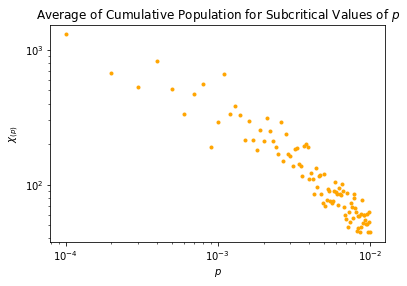

In [26]:
plt.loglog(np.abs(p_mat[:-1]-0.5), average_cum_pop[:-1], '.', c = 'orange')
plt.title("Average of Cumulative Population for Subcritical Values of $p$")
plt.ylabel("$\chi_{(p)}$")
plt.xlabel("$p$")

# plt.savefig("2nd critical exponent01.png")

In [29]:
fit2 = np.polyfit(np.log(np.abs(p_mat[:-1] - 0.5)), np.log(average_cum_pop[:-1]), 1)

fit2

array([-0.77590213,  0.46428647])

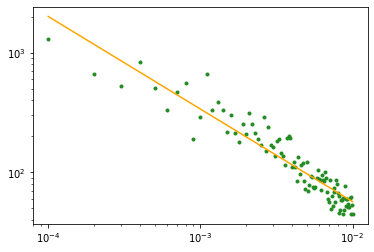

In [30]:
plt.loglog(np.abs(p_mat[:-1]-0.5), average_cum_pop[:-1], '.', c = 'forestgreen', label = 'Data')
plt.loglog(np.abs(p_mat[:-1]-0.5), np.e ** (fit2[0] * np.log(np.abs(p_mat[:-1] - 0.5)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |p - p_c|^{np.round(fit2[0], 3)}$')


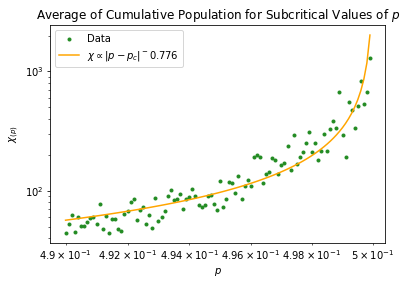

In [28]:
plt.loglog(p_mat[:-1], average_cum_pop[:-1], '.', c = 'forestgreen', label = 'Data')
plt.loglog(p_mat[:-1], np.e ** (fit2[0] * np.log(np.abs(p_mat[:-1] - 0.5)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |p - p_c|^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $p$")
plt.ylabel("$\chi_{(p)}$")
plt.xlabel("$p$")
# plt.xlim(0, 1.2)
plt.legend()

# plt.savefig("2nd critical exponent02.png")

## $P_\chi (\chi)$ 
Distribution of cluster sizes.

Text(0.5, 1.0, '$\\chi$ size distribution for $p = $0.5')

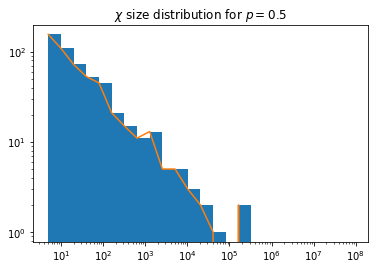

In [74]:
b = 5
a = 2
bins = b * a ** np.arange(25)
y, bins, other = plt.hist(cum_pop, bins = bins)
plt.loglog(bins[:-1], y)
plt.title(f"$\chi$ size distribution for $p = ${p}")

In [76]:
print(np.size(y[y>0]))

15


In [75]:
fit = np.polyfit(np.log(bins[:14]), np.log(y[:14]), 1)
fit

array([-0.53081093,  5.92545614])

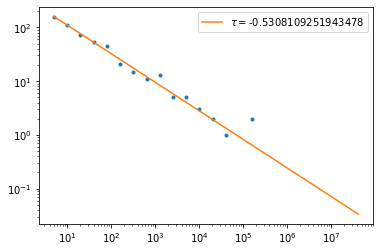

In [77]:
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${fit[0]}')

plt.legend()

 Repeat caculation for a variety of size of systems. Then plot $\langle s^k \rangle$ versus size of the system.
 
\begin{equation}
n_s = s^{-\tau} \mathcal{F}(s/L^D)
\end{equation}



In [87]:
def ngen_cumulative_population(pop_0, pc, generation):
    pop = []
    pop.append(pop_0)
    for i in range(generation):
        pop.append(next_gen(int(pop[i]), pc))
        
    return np.sum(pop[:])

In [93]:
p = 0.5

ngen_cumulative_population(pop_0, p, generation)

37

Wall time: 21.4 s


Text(0.5, 1.0, 'Cluster size distribution for sdifferent system sizes')

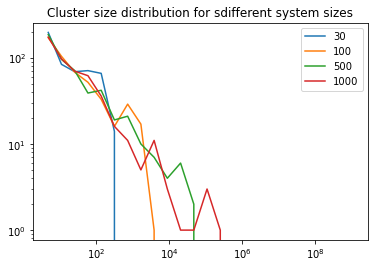

In [115]:
%%time

b = 5
a = 2.3
bins = b * a ** np.arange(25)
ave = 1000
k   = np.arange(2, 7, 1)
gen_range = [30, 100, 500, 1000]
sk  = np.zeros((np.size(k), np.size(gen_range)))

for generation in gen_range:
    pop_0 = 1
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = ngen_cumulative_population(pop_0, p, generation)
    y, bins = np.histogram(cum_pop, bins = bins)
    for j in range(np.size(k)):
        sk[j, gen_range.index(generation)] = np.mean(cum_pop ** k[j]) 
    plt.loglog(bins[:-1], y, label = f'{generation}')

plt.legend()
plt.title("Cluster size distribution for sdifferent system sizes")

s is collapse size.
\begin{align}
\langle s^k \rangle &= \int_1^\infty{s^{k-\tau} \mathcal{F}(s/L^D) ds} \\
&\propto L^{D(k-\tau + 1)}
\end{align}

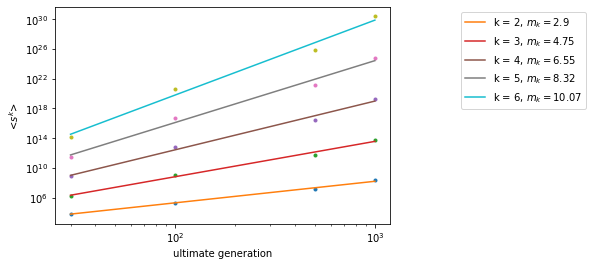

In [121]:
for j in range(np.size(k)):
    plt.loglog(gen_range, sk[j, :], '.')
    fit = np.polyfit(np.log(gen_range), np.log(sk[j, :]), 1)
    plt.loglog(gen_range, np.exp(fit[1] + fit[0] * np.log(gen_range)), label = f'k = {k[j]}, $m_k = ${round(fit[0], 2)}')
    
plt.ylabel("<$s^k$>")
plt.xlabel("ultimate generation")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1))

Text(0.5, 0, '$k$')

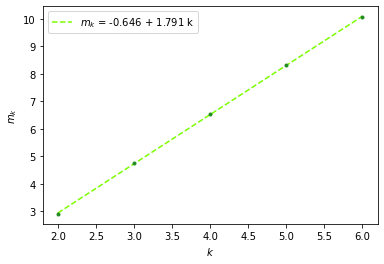

In [123]:
mk = np.array([2.9, 4.75, 6.55, 8.32, 10.07])
k  = np.arange(2, 7)

fit = np.polyfit(k, mk, 1)

plt.plot(k, (fit[1] + fit[0] * k), '--', c = 'lawngreen', label = f'$m_k$ = {round(fit[1], 3)} + {round(fit[0], 3)} k')
plt.plot(k, mk, '.', c = 'forestgreen')
plt.legend()
plt.ylabel("$m_k$")
plt.xlabel("$k$")

In [124]:
tau = 1 - fit[1] / fit[0]
D   = fit[0]
print('τ = ', tau, 'D = ', D)

τ =  1.3606923506420996 D =  1.7910000000000001


0.0
[-0.52075238  5.00891676]


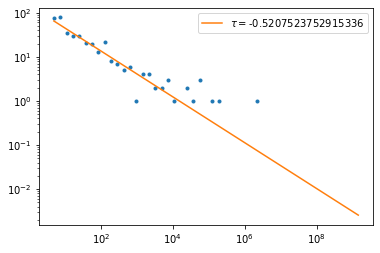

In [114]:
uplim = np.size(y[y>0])
print(y[20])
uplim = 20
fit = np.polyfit(np.log(bins[:uplim]), np.log(y[:uplim]), 1)
print(fit)
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${fit[0]}')

plt.legend()

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [39]:
def population(pop_0, p, generation):
    pop = []
    survival = np.zeros(generation)
    pop.append(pop_0)
    survival[0] = 1
    for t in range(generation):
        new_pop = next_gen(int(pop[t]), p)
        pop.append(new_pop)

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

Wall time: 37.3 s


Text(0.5, 0, 'k')

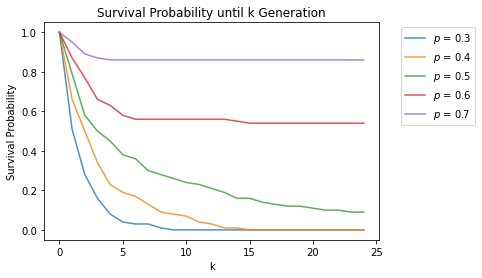

In [42]:
%%time

generation = 25
samples    = 100
pop_0      = 1


p_mat = np.arange(0.3, 0.8, 0.1)

survival = np.zeros(generation)

for p in p_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, p, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$p$ = {np.round(p, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

# plt.savefig("Survival Probability.png")

Clearly for supercritical curves it tends to a nonzero value and for subcritical ones it decays exponentially. Critical curve has a different behavoir as we expect.
$P_k(\lambda) \propto k^{-\frac{1}{\delta}}$

In [58]:
generation = 300
samples    = 5000
pop_0      = 1

survival = np.zeros(generation)
k        = np.arange(generation) + 1

p = 0.5

survival = 0
for s in range(samples):
    survival += population(pop_0, p, generation)
survival_probability = survival / samples

print(survival_probability)

fit3 = np.polyfit(np.log(k), np.log(survival_probability), 1)
fit3

[1.     0.7456 0.603  0.514  0.4512 0.3942 0.3588 0.3236 0.2974 0.2746
 0.2558 0.2384 0.2244 0.208  0.1976 0.1852 0.1752 0.1662 0.1576 0.1502
 0.1438 0.1398 0.1348 0.13   0.1244 0.121  0.1166 0.1118 0.1088 0.1042
 0.1008 0.0994 0.095  0.0922 0.09   0.088  0.0866 0.084  0.0808 0.0786
 0.0768 0.0748 0.0734 0.072  0.071  0.07   0.0684 0.067  0.0662 0.0642
 0.0628 0.0608 0.0592 0.0582 0.0572 0.0566 0.056  0.0544 0.0534 0.0522
 0.0518 0.0516 0.0508 0.0502 0.0498 0.0486 0.048  0.0472 0.0468 0.046
 0.046  0.0454 0.0448 0.0434 0.0428 0.042  0.0416 0.0414 0.041  0.04
 0.0394 0.0394 0.0386 0.0382 0.0378 0.0374 0.037  0.0362 0.0354 0.0354
 0.0348 0.0342 0.0338 0.0336 0.0334 0.0328 0.0328 0.0326 0.0322 0.032
 0.0316 0.0314 0.0312 0.0308 0.0306 0.0306 0.0302 0.0298 0.0298 0.0292
 0.0288 0.0288 0.0286 0.0274 0.0272 0.0266 0.0264 0.0258 0.0258 0.0256
 0.0252 0.0252 0.025  0.0244 0.024  0.024  0.024  0.024  0.024  0.0238
 0.0238 0.0238 0.0234 0.0232 0.0232 0.0228 0.0226 0.0224 0.0218 0.0216
 0.0214 0.

array([-0.92193997,  0.78680279])

In [59]:
delta = -1/fit3[0]
delta

1.0846693158397893

Make an estimation closer to 1 by increasing "generations".

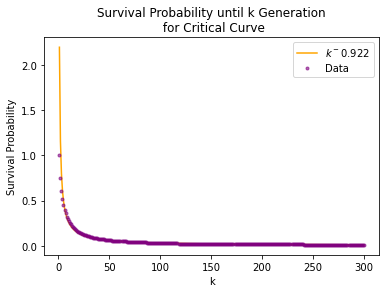

In [61]:
plt.plot(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.plot(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()

# plt.savefig("Critical Curve.png")

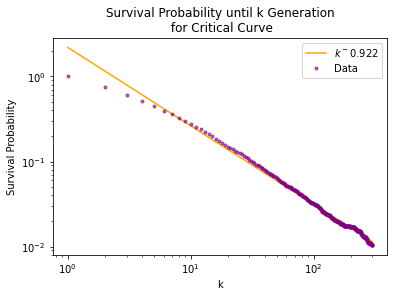

In [78]:
plt.loglog(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.loglog(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()